In [62]:
# Magic!
%matplotlib inline

# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_raw = "data/city_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_raw)

city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [63]:
# File to Load (Remember to change these)
ride_data_raw = "data/ride_data.csv"

# Read the City and Ride Data
ride_data_df = pd.read_csv(ride_data_raw)

# Display the data table for preview
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [64]:
# Combine the data into a single dataset
city_ride_df = pd.merge(city_data_df, ride_data_df, how="outer", on="city")

# Display the data table for preview
city_ride_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [65]:
#Rename some column headers using ".rename"
pyber_df = city_ride_df.rename(columns={"city": "Location", "driver_count":"Local Drivers", "type": "Geographic Type", "date": "Date", "fare":"Fare Paid", "ride_id": "Ride ID",})

pyber_df.head()

,Location,Local Drivers,Geographic Type,Date,Fare Paid,Ride ID
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [66]:
# Create separate data frames based on city types - Urban, Suburban and Rural
urban_df = pyber_df.loc[(pyber_data_df["Geographic Type"] == "Urban")]
suburban_df = pyber_df.loc[(pyber_data_df["Geographic Type"] == "Suburban")]
rural_df = pyber_df.loc[(pyber_data_df["Geographic Type"] == "Rural")]

In [67]:
#Calculate average fare by data frame
urban_avg_fare = urban_df.groupby(["Location"])["Fare Paid"].mean()
suburban_avg_fare = suburban_df.groupby(["Location"])["Fare Paid"].mean()
rural_avg_fare = rural_df.groupby(["Location"])["Fare Paid"].mean()

In [68]:
#Calculate number of rides
urban_ride_count = urban_df.groupby(["Location"])["Ride ID"].count()
suburban_ride_count = suburban_df.groupby(["Location"])["Ride ID"].count()
rural_ride_count = rural_df.groupby(["Location"])["Ride ID"].count()

In [69]:
#Calculate number of drivers 
urban_driver_count = urban_df.groupby(["Location"])["Local Drivers"].count()
suburban_driver_count = suburban_df.groupby(["Location"])["Local Drivers"].count()
rural_driver_count = rural_df.groupby(["Location"])["Local Drivers"].count()

## Bubble Plot of Ride Sharing Data

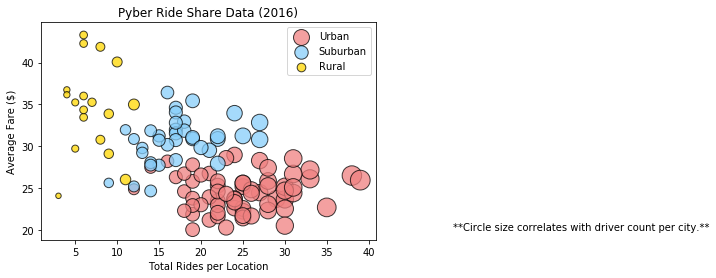

In [70]:
# Build the scatter plots for each city types
#TO DO: WHY IS THE PLOTTING REVERSED?

plt.scatter(urban_ride_count, urban_avg_fare, s = urban_driver_count*10, label = "Urban", color = "lightcoral", marker = "o", edgecolors="black", alpha = .75)

plt.scatter(suburban_ride_count, suburban_avg_fare, s = suburban_driver_count*10, label = "Suburban", color = "lightskyblue", marker = "o", edgecolors="black", alpha = .75)

plt.scatter(rural_ride_count, rural_avg_fare, s = rural_driver_count*10, label = "Rural", color = "gold", marker = "o", edgecolors="black", alpha = .75)


#plt.scatter(rural_df["# of Rides"], rural_df["Average Fare"], s = rural_df["Local Drivers"]*5, label = "Rural", color = "gold", edgecolors="black", alpha = .075)


# Add information for the viewer (labels, legend, etc.)
plt.title("Pyber Ride Share Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Rides per Location")

# Add a legend
#TO DO: CHANGE LEGEND LOCATION AFTER ADJUSTING AXIS!!!!!
#TO DO: HOW DO I CHANGE THE TRANSPARENCY ON THE LEGEND ONLY (ALPHA = .5)
plt.legend(loc= "upper right")

# Add text to alert viewer for what circle size corresponds to
plt.text(50, 20, "**Circle size correlates with driver count per city.**")


# Save Figure
plt.show()

## Total Fares by City Type

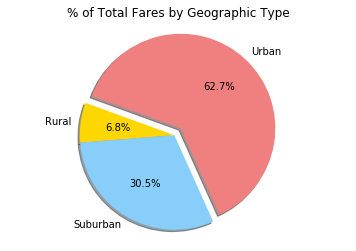

In [71]:
# Calculate percent of all Fare income by Geographic Type
fare_income = pyber_df.groupby(["Geographic Type"])["Fare Paid"].sum()

# Pie section labels
#QUESTION: WHY DO I HAVE TO REVERSE THE ORDER TO GET THIS CORRECT? DOES IT ALWAYS START ON THE FAR LEFT?
labels = ["Rural", "Suburban", "Urban" ]

# Pie colors aligned to Geographic Type
colors = ["gold", "lightskyblue", "lightcoral"]

# Break apart the largest piece of the pie
explode = (0, 0, 0.1)

# Add title and ensure it's a circle (not an ellipse)
plt.title("% of Total Fares by Geographic Type")
plt.pie(fare_income, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
plt.axis("equal")


plt.show()


# Save Figure


## Total Rides by City Type

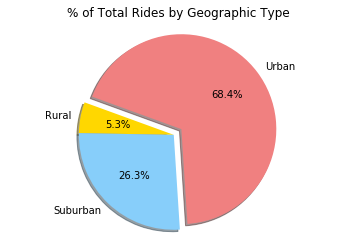

In [72]:
# Calculate percent of all Fare income by Geographic Type
rides_by_location = pyber_df.groupby(["Geographic Type"])["Ride ID"].count()

# Pie section labels
#QUESTION: WHY DO I HAVE TO REVERSE THE ORDER TO GET THIS CORRECT? DOES IT ALWAYS START ON THE FAR LEFT?
labels = ["Rural", "Suburban", "Urban" ]

# Pie colors aligned to Geographic Type
colors = ["gold", "lightskyblue", "lightcoral"]

# Break apart the largest piece of the pie
explode = (0, 0, 0.1)

# Add title and ensure it's a circle (not an ellipse)
plt.title("% of Total Rides by Geographic Type")
plt.pie(rides_by_location, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
plt.axis("equal")
plt.show()

## Total Drivers by City Type

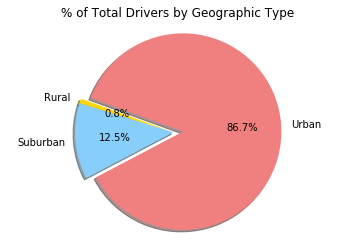

In [73]:
# Calculate percent of all Fare income by Geographic Type
#UGH, IT'S CLOSER WITH SUM INSTEAD OF COUNT, YET BOTH ARE THE WRONG NUMBERS AND I DON'T UNDERSTAND WHY!!!!
drivers_by_location = pyber_df.groupby(["Geographic Type"])["Local Drivers"].sum()

# Pie section labels
#QUESTION: WHY DO I HAVE TO REVERSE THE ORDER TO GET THIS CORRECT? DOES IT ALWAYS START ON THE FAR LEFT?
labels = ["Rural", "Suburban", "Urban" ]

# Pie colors aligned to Geographic Type
colors = ["gold", "lightskyblue", "lightcoral"]

# Break apart the largest piece of the pie
explode = (0, 0, 0.1)

# Add title and ensure it's a circle (not an ellipse)
plt.title("% of Total Drivers by Geographic Type")
plt.pie(drivers_by_location, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
plt.axis("equal")
plt.show()

In [74]:
# Show Figure
plt.show()

In [75]:
#Additional ways to look at this data in a more detailed way would be a variety of tables 
#These tables will show each Location within it's Geographic Type

#Create a groupby to break out info by Urban/Suburban/Rural as well as Location name
geo_groupby = pyber_df.groupby(["Geographic Type", "Location"])

geo_groupby

In [76]:
#Calculate average fare
geo_avg_fare = geo_groupby["Fare Paid"].mean()

geo_avg_fare.head()

Geographic Type  Location      
Rural            Bradshawfurt      40.064000
                 Garzaport         24.123333
                 Harringtonfort    33.470000
                 Jessicaport       36.013333
                 Lake Jamie        34.358333
Name: Fare Paid, dtype: float64

In [77]:
#Calculate number of rides
geo_ride_count = geo_groupby["Location"].count()

geo_ride_count.head()

Geographic Type  Location      
Rural            Bradshawfurt      10
                 Garzaport          3
                 Harringtonfort     6
                 Jessicaport        6
                 Lake Jamie         6
Name: Location, dtype: int64

In [78]:
#Calculate number of drivers 
geo_driver_count = geo_groupby["Local Drivers"].mean()
geo_driver_count.head()

Geographic Type  Location      
Rural            Bradshawfurt      7
                 Garzaport         7
                 Harringtonfort    4
                 Jessicaport       1
                 Lake Jamie        4
Name: Local Drivers, dtype: int64

In [79]:
#Put elements into a dataframe
pyber_groupby_data_df = pd.DataFrame({"Local Drivers": geo_driver_count,
                                      "# of Rides": geo_ride_count,
                                      "Average Fare": geo_avg_fare,})

pyber_groupby_data_df["Average Fare"] = pyber_groupby_data_df["Average Fare"].map("${:,.2f}".format)

pyber_groupby_data_df

Local Drivers  # of Rides Average Fare
Geographic Type Location                                                    
Rural           Bradshawfurt                      7          10       $40.06
                Garzaport                         7           3       $24.12
                Harringtonfort                    4           6       $33.47
                Jessicaport                       1           6       $36.01
                Lake Jamie                        4           6       $34.36
                Lake Latoyabury                   2          11       $26.06
                Michaelberg                       6          12       $35.00
                New Ryantown                      2           6       $43.28
                Newtonview                        1           4       $36.75
                North Holly                       8           9       $29.13
                North Jaime                       1           8       $30.80
                Penaborough                       6           5       $35.25
                Randallchester                    9           5       $29.74
                South Jennifer                    7           7       $35.26
                South Marychester                 1           8       $41.87
                South Saramouth                   7           4       $36.16
                Taylorhaven                       1           6       $42.26
                West Heather                      4           9       $33.89
Suburban        Barronchester                    11          16       $36.42
                Bethanyland                      22          18       $32.96
                Brandonfort                      10          19       $35.44
                Colemanland                      23          22       $30.89
                Davidfurt                        23          17       $32.00
                East Aaronbury                    7           9       $25.66
                East Danielview                  22          17       $31.56
                East Kentstad                    20          13       $29.82
                East Marymouth                    5          27       $30.84
                Grayville                         2          15       $27.76
                Josephside                       25          27       $32.86
                Lake Ann                          3          12       $30.89
...                                             ...         ...          ...
Urban           Port Johnbury                     3          22       $23.01
                Port Samanthamouth               57          25       $25.64
                Raymondhaven                     11          25       $21.48
                Reynoldsfurt                     67          19       $21.92
                Richardfort                      38          28       $22.37
                Roberthaven                      47          24       $23.73
                Robertport                       12          20       $23.06
                Rodneyfort                       34          23       $28.62
                Rogerston                        25          22       $22.10
                Royland                          64          30       $20.57
                Simpsonburgh                     21          24       $23.36
                South Evanton                    11          31       $26.73
                South Jack                       46          19       $22.97
                South Karenland                   4          38       $26.54
                South Latoya                     10          19       $20.09
                South Michelleport               72          31       $24.45
                South Phillip                    38          31       $28.57
                Valentineton                     45          22       $24.64
                West Angela                      48          39       $25.99
                West Anthony      